In this notebook, I will scrape tweets from Habitat International's Twitter (@Habitat_org) and then look to see which specific words, if any, lead to higher engagement. I'll also see if any form of media leads to higher engagement as well.

Thanks to Martin Beck for his article on twitter scraping: https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1

In [57]:
# Imports
import tweepy
import pandas as pd
import time
import numpy as np
import re

Authentication. Keys have been commented out but you can get your own at the twitter developer site: https://developer.twitter.com/en

In [2]:
## Authentication Credentials

#consumer_key = 'X'
#consumer_secret = 'X'
#access_token = "X"
#access_token_secret = "X"
##using those credentials to access Tweepy API
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
## Input username to scrape tweets and name csv file
## Max recent tweets pulls x amount of most recent tweets from that user
#username = 'Habitat_org'
#Set my count to maximum allowed by Twitter through Tweepy API
#count = 3200

## Creation of query method using parameters
#tweets = tweepy.Cursor(api.user_timeline, id=username, tweet_mode='extended').items(count)
 
## Pulling information from tweets iterable object
## Add or remove tweet information you want in the below list comprehension
#tweets_list = [[tweet.full_text, tweet.created_at, tweet.id_str, \
#                tweet.retweet_count, tweet.favorite_count] for tweet in tweets]
 
## Creation of dataframe from tweets_list
#tweets_df = pd.DataFrame(tweets_list,columns = ['Tweet_Text','Tweet_Date','Tweet_ID','Retweets','Favorites'])


In [4]:
##turning frame into .csv for later use
#tweets_df.to_csv('habitattweets.csv')

From here on in, I am using a csv pulled on 10/5/2020 at 2:45 AM ET to avoid constantly hitting twitter. I will rerun this script once it is working as expected to get their most recent tweets. The current oldest date I am seeing is 8/3/2017.

My next step is parsing the tweets to pull out key words. Thanks to Datacamp.com for getting me started here.

In [5]:
#importing tools
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [6]:
#pulling saved .csv
df = pd.read_csv("habitattweets.csv")

In [7]:
df.dtypes

Unnamed: 0     int64
Tweet_Text    object
Tweet_Date    object
Tweet_ID       int64
Retweets       int64
Favorites      int64
dtype: object

Now, I'm going to make a wordcloud with all of these tweets to see if anything sticks out.

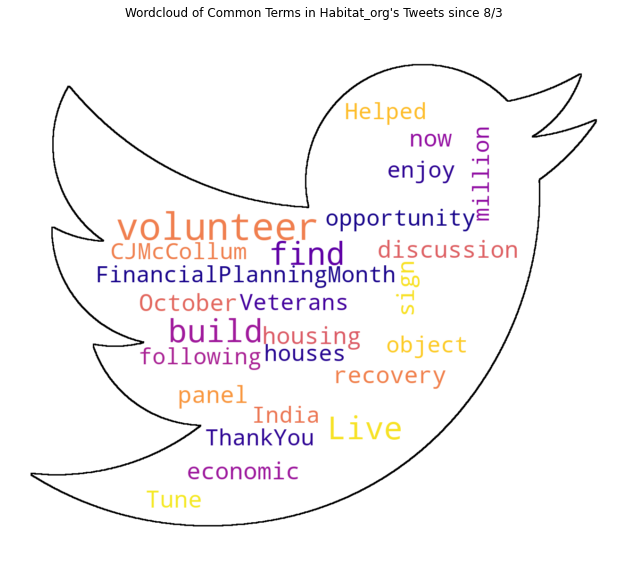

In [10]:
#putting list of words in their own frame
Habitat_Cloud = df['Tweet_Text']
#Putting into the twitter logo so that it looks cool
tweet_mask = np.array(Image.open("twitter_logo.png"))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["RT", "people", "items", "dtype", "length","pa","spen","Re","pa",\
                  "Tweet_Text","fro","focu","nearly","secret","often","Name","HabitatforHumanity"])
# Create and generate a word cloud image:
wordcloud = WordCloud(mask = tweet_mask,contour_width = 4, background_color = 'white',contour_color = 'black',\
                      max_font_size=80,max_words=200,stopwords=stopwords,colormap='plasma').generate(str(Habitat_Cloud))
#showing word cloud
fig= plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud of Common Terms in Habitat_org's Tweets since 8/3/2017")
plt.axis("off")
plt.show()
fig.savefig('Habitat_Word_Cloud.png')

Now, I'm going to try and filter for the most successful tweets. I am defining success as a sum of retweets and favorites, since those scores typically indicate higher engagement.

In [36]:
df.columns = ['ID','Tweet_Text','Tweet_Date','Tweet_ID','Retweets','Favorites']
df.columns

Index(['ID', 'Tweet_Text', 'Tweet_Date', 'Tweet_ID', 'Retweets', 'Favorites'], dtype='object')

In [43]:
#Creating a version of the table that sorts tweets by retweets and then by favorites. 
#I'm then going to filter this to account for tweets that are in the top 50%
ranked_tweets = df.sort_values(by = ["Retweets","Favorites"],\
                               ascending = False, axis=0).reset_index(drop=True)

In [45]:
#looking at data to get an idea of typical retweet and favorite numbers
ranked_tweets.describe()

,ID,Tweet_ID,Retweets,Favorites
count,3223.000000,3.223000e+03,3223.000000,3223.000000
mean,1611.000000,1.091338e+18,17.733168,34.249457
std,930.544285,1.216363e+17,134.303607,61.078196
min,0.000000,8.931798e+17,0.000000,0.000000
25%,805.500000,9.838107e+17,2.000000,0.000000
50%,1611.000000,1.097924e+18,9.000000,22.000000
75%,2416.500000,1.188695e+18,18.000000,46.000000
max,3222.000000,1.313102e+18,6904.000000,1492.000000


In [48]:
#printed the top twenty tweets just to see what a highly shared habitat tweet looks like.
ranked_tweets.head(20)

,ID,Tweet_Text,Tweet_Date,Tweet_ID,Retweets,Favorites
0,1038,RT @CNN: 94-year-old former President Jimmy Ca...,2019-08-27 18:42:27,1166420729732227072,6904,0
1,1032,RT @JJWatt: Hurricane Harvey Relief:\nTwo Year...,2019-08-29 19:37:00,1167159233688875008,2379,0
2,3060,RT @CarterCenter: Former U.S. Presidents Launc...,2017-09-08 12:14:18,906128559684681728,1687,0
3,1798,RT @WHO: The quality of housing has major impl...,2018-11-28 21:34:00,1067894401417060360,576,0
4,1955,Happy 94th birthday to former U.S. President a...,2018-10-01 15:01:46,1046777194880684032,537,1492
5,3027,RT @handinhandfund: PHONE LINES ARE NOW OPEN &...,2017-09-12 23:47:03,907752448999264258,498,0
6,2234,RT @NLIHC: #OOR18 is now available! Check it o...,2018-06-13 19:18:01,1006979017386463232,391,0
7,2934,Happy 93rd birthday to Jimmy Carter! President...,2017-10-01 14:28:06,914497151295787008,377,831
8,52,RT @iSmashFizzle: This should make you feel si...,2020-09-03 13:35:48,1301514232119332865,362,0
9,2921,".@daddy_yankee, a Puerto Rico native, is pledg...",2017-10-04 20:50:52,915680641404084231,317,736


After looking at the top 20 tweets, it looks like many of Habitat's posts that are retweets of other people, such as Trisha Yearwood or Daddy Yankee. While this is good to know, it doesn't help with my efforts to answer the specific question of what words Habitat can put in their own self written tweets to drive engagement. Therefore, I am going to try and filter out the posts that are retweets of somebody else's account.

In [64]:
#It looks like many of habitat's retweets open with "RT" so I'm going to make a list of those and then filter my frame
#converting to a series, finding the ones that match, and adding back to the table
find_RT = ranked_tweets['Tweet_Text']
#create series that has 0 for any text entry that contains RT
RT_found = find_RT.str.find('RT ')
#add column to table with 0's
ranked_tweets['RT'] = RT_found
#create new table with those rows with zero gone
no_RTs = ranked_tweets[ranked_tweets['RT'] != 0].reset_index(drop=True)

In [66]:
del no_RTs['RT']
no_RTs.head(20)

,ID,Tweet_Text,Tweet_Date,Tweet_ID,Retweets,Favorites
0,1955,Happy 94th birthday to former U.S. President a...,2018-10-01 15:01:46,1046777194880684032,537,1492
1,2934,Happy 93rd birthday to Jimmy Carter! President...,2017-10-01 14:28:06,914497151295787008,377,831
2,2921,".@daddy_yankee, a Puerto Rico native, is pledg...",2017-10-04 20:50:52,915680641404084231,317,736
3,1893,"Through November 14, @Bethesda will be auction...",2018-10-25 13:41:00,1055454179379044352,198,675
4,2798,Today @daddy_yankee joined us and @SavetheChil...,2017-11-07 17:25:28,927950141918793731,155,583
5,2073,"On #WorldHumanitarianDay, we recognize our Hab...",2018-08-19 15:07:06,1031195858975514624,139,809
6,5,"Happy birthday, President Carter! We are so gr...",2020-10-01 13:14:02,1311655614658027520,129,331
7,822,We wish President Carter a speedy recovery. ht...,2019-10-22 13:40:57,1186638574697025536,123,412
8,2401,Happy #NationalVolunteerWeek! Every part of ou...,2018-04-15 16:26:00,985554844810391556,116,279
9,937,"Happy 95th birthday, President Carter! We can’...",2019-10-01 13:14:02,1179021656263663616,114,308


Immediate thoughts: Jimmy Carter is backing up his reputation as the celebrity "face" of Habitat for Humanity! I'm not sure it is an effective strategy to talk about him every day, but it seems like most of these are birthday tweets; maybe they can work him in a little more often.<br>
It looks like other celebrities such as Daddy Yankee and the Property Brothers provide a real boost as well.<br><br>
I'd like to filter this table now just for the top quarter of tweets that received engagement, and then make another wordcloud to see if there is a noticeable difference.

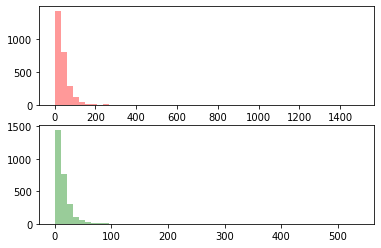

In [72]:
#before looking at measures of centrality, i'd like to take a quick look at the spread of the data
fig, (ax1,ax2) = plt.subplots(2)
#the top two Jimmy Carter tweets really stretch these out - 
#I'll want to make sure to use median/percentile to avoid getting my numbers thrown off
ax1.hist(no_RTs['Favorites'],bins=50,alpha=0.4,color='red',)
ax2.hist(no_RTs['Retweets'],bins=50,alpha=0.4,color='green')
plt.show()

In [73]:
no_RTs.describe()
#same as what I'm seeing in the histogram - the mean favorites are almost 50% higher than the median favorites

,ID,Tweet_ID,Retweets,Favorites
count,2756.000000,2.756000e+03,2756.000000,2756.000000
mean,1618.617925,1.090280e+18,13.685414,40.031930
std,938.077285,1.227003e+17,20.602189,64.277798
min,0.000000,8.931798e+17,0.000000,0.000000
25%,805.750000,9.819668e+17,1.000000,2.000000
50%,1633.000000,1.095504e+18,10.000000,28.500000
75%,2444.250000,1.188625e+18,19.000000,51.000000
max,3222.000000,1.313102e+18,537.000000,1492.000000


In [80]:
#creating smaller frame  to only pull tweets that were in the 75th percentile for retweets OR Favorites
top_tweets = no_RTs[(no_RTs.Retweets >= 19)| (no_RTs.Favorites >= 51)]
#rerunning description to see new stats = numbers are much higher, but also  more skewed - 
#the mean almost matches the 75th percentile!
top_tweets.describe()

,ID,Tweet_ID,Retweets,Favorites
count,860.000000,8.600000e+02,860.000000,860.000000
mean,1855.444186,1.059113e+18,30.912791,90.897674
std,866.615008,1.133431e+17,29.300388,94.529464
min,5.000000,8.934684e+17,5.000000,15.000000
25%,1239.750000,9.625688e+17,19.000000,53.000000
50%,1958.500000,1.045900e+18,25.000000,66.000000
75%,2600.750000,1.141460e+18,34.000000,94.250000
max,3221.000000,1.311656e+18,537.000000,1492.000000


I'm now going to make another wordcloud with just these tweets

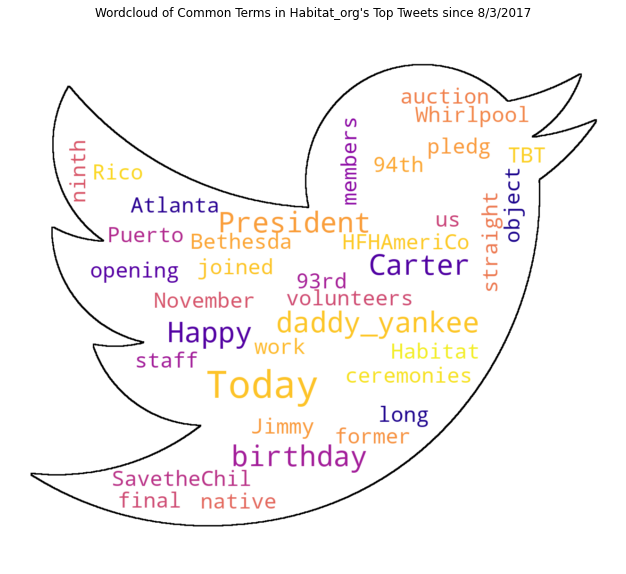

In [94]:
#putting list of words in their own frame
Habitat_Top_Cloud = top_tweets['Tweet_Text']
#Putting into the twitter logo so that it looks cool
toptweet_mask = np.array(Image.open("twitter_logo.png"))
# Create stopword list:
topstopwords = set(STOPWORDS)
topstopwords.update(["RT", "people", "items", "dtype", "length","pa","spen","Re","pa",\
                  "Tweet_Text","fro","focu","nearly","secret","often","Name","HabitatforHumanity","year","sti","day","will","Wor"])
# Create and generate a word cloud image:
topwordcloud = WordCloud(mask = toptweet_mask,contour_width = 4, background_color = 'white',contour_color = 'black',\
                      max_font_size=80,max_words=200,stopwords=topstopwords,colormap='plasma').generate(str(Habitat_Top_Cloud))
#showing word cloud
fig = plt.figure(figsize=[20,10])
plt.imshow(topwordcloud, interpolation='bilinear')
plt.title("Wordcloud of Common Terms in Habitat_org's Top Tweets since 8/3/2017")
plt.axis("off")
plt.show()
fig.savefig('Habitat_Top_Word_Cloud.png')

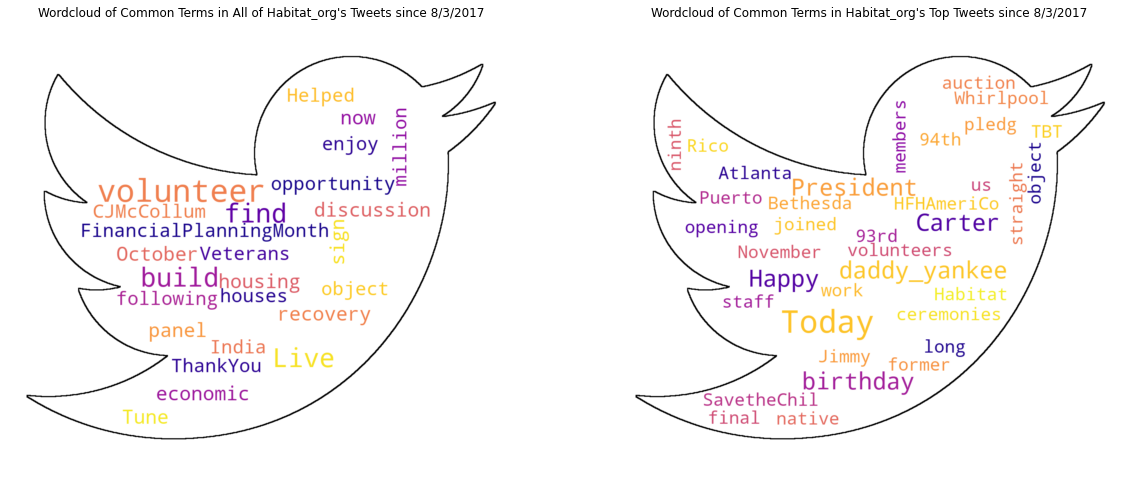

In [95]:
#putting the two clouds next to each other
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (20,20))
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_title("Wordcloud of Common Terms in All of Habitat_org's Tweets since 8/3/2017")
ax1.axis("off")
ax2.imshow(topwordcloud, interpolation='bilinear')
ax2.set_title("Wordcloud of Common Terms in Habitat_org's Top Tweets since 8/3/2017")
ax2.axis("off")
plt.show()
fig.savefig('Habitat_Comp_Cloud.png')

My current advice for the Habitat Social Team would be to:<br><br>
Continue pushing social media interaction with celebrities, and consider finding more partners to work with, such as influencers or famous athletes. For example, I know DeShaun Watson and Warrick Dunn have strong connections to Habitat. Try reaching out!<br>
Don't be afraid to talk more about Jimmy Carter.<br>
Continue emphasizing partnerships as well.

My next steps: I am currently learning more about ML, and would love to apply a sentiment analysis to these tweets once I am upskilled. That will be in a separate notebook.